In [1]:
#From the console, run the following
#pip install numpy
#pip install scipy
#pip install scikit-learn
#pip install matplotlib

# Import required packages here (after they are installed)
from math import *
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as mp
from pylab import show


from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate


from statistics import mean, stdev, median, mode

In [2]:
# Load data. csv file should be in the same folder as the notebook for this to work, otherwise
# give data path.
data = np.loadtxt("data.csv")
np.random.seed(100)

In [3]:
def minimum(x,y):
    min = np.argmin(y)

    return x[min]

In [4]:
def minimum3(x,y,z):
    min = np.argmin(z)

    return x[min], y[min], z[min]

In [5]:
def decisionRegion(clf, X, Y):
    

# Lists to hold inpoints, predictions and assigned colors
    xPred = []
    yPred = []
    cPred = []
# Use input points to get predictions here
    for xP in range(-100,100):
        xP = xP/100.0
        for yP in range(-100,100):
            yP = yP/100.0
            xPred.append(xP)
            yPred.append(yP)
            if(clf.predict([[xP,yP]])=="1.0"):
                cPred.append("b")
            else:
                cPred.append("r")

## Visualize Results
#plot the points
    mp.scatter(X,Y,s=3,c=colors)

#plot the regions
    mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
    mp.xlim(-1,1)
    mp.xlabel("Average Intensity")
    mp.ylim(-1,1)
    mp.ylabel("Intensity Variance")


In [6]:
#shuffle the data and select training and test data
np.random.seed(100)
np.random.shuffle(data)


features = []
digits = []


for row in data:
    #import the data and select only the 1's and 5's
    if(row[0]==1 or row[0]==5):
        features.append(row[1:])
        digits.append(str(row[0]))

        
#Select the proportion of data to use for training. 
#Notice that we have set aside 80% of the data for testing
numTrain = int(len(features)*.2)

trainFeatures = features[:numTrain]
testFeatures = features[numTrain:]
trainDigits = digits[:numTrain]
testDigits = digits[numTrain:]



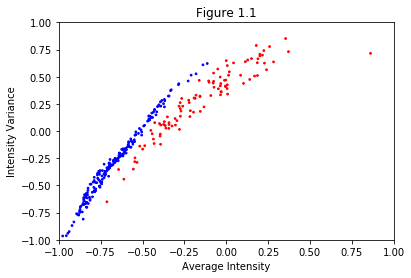

In [7]:
#Convert the 256D data (trainFeatures) to 2D data
#We need X and Y for plotting and simpleTrain for building the model.
#They contain the same points in a different arrangement

X = []
Y = []
simpleTrain = []

#Colors will be passed to the graphing library to color the points.
#1's are blue: "b" and 5's are red: "r"
colors = []
for index in range(len(trainFeatures)):
    #produce the 2D dataset for graphing/training and scale the data so it is in the [-1,1] square
    xNew = 2*np.average(trainFeatures[index])+.75 
    yNew = 3*np.var(trainFeatures[index])-1.5
    X.append(xNew)
    Y.append(yNew)
    simpleTrain.append([xNew,yNew])
    #trainDigits will still be the value we try to classify. Here it is the string "1.0" or "5.0"
    if(trainDigits[index]=="1.0"):
        colors.append("b")
    else:
        colors.append("r")


#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
mp.scatter(X,Y,s=3,c=colors)

#specify the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")
mp.title("Figure 1.1")
#display the current graph
show()

[5, 10, 15, 20, 30, 40, 50, 75, 100, 200, 500, 1000, 10000]


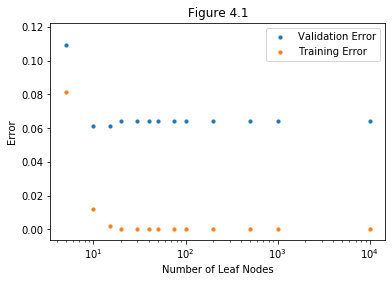

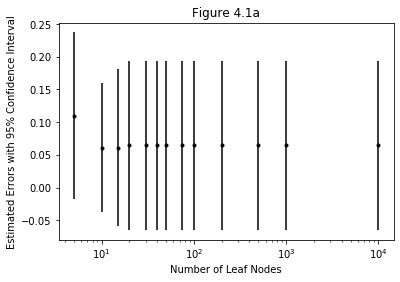

In [8]:
# USING 2D dimensional data
mln = [5, 10, 15, 20, 30, 40, 50, 75, 100, 200, 500, 1000, 10000]
# model = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes =5)
# x  = cross_validate(model, simpleTrain, trainDigits, cv = 10, scoring='accuracy', return_train_score = True)
# print(x)
# print(f)
# USING 2D dimensional data
x = []
y = []
z = []
p =[]
m=[]
n = []
std =[]
for i in range(len(mln)):
    #print(i)
    model  = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = mln[i], random_state = 100)
    #model2.predict(testFeatures)
    cvs =  cross_validate(model, simpleTrain, trainDigits, cv = 10, scoring='accuracy', return_train_score = True)
    test_err = 1-cvs['test_score']
    train_err = 1 - cvs['train_score']
    evsm_test = test_err.mean()
    evsm_train = train_err.mean()
    temp = stdev(test_err)
    temp2 = evsm_test + temp
    m.append(evsm_test)
    n.append(evsm_train)
    std.append(2*temp)
    p.append(temp2)
    x.append(mln[i])
    y.append(evsm_test)
    z.append([mln[i],evsm_test])
        
# print(len(x))
# print(len(y))
print(mln)   
mp.scatter(x,y, s=10, label = 'Validation Error')
mp.scatter(x,n, s = 10, label = "Training Error" )
mp.xlabel("Number of Leaf Nodes")
mp.xscale('log')
mp.ylabel("Error")
mp.title("Figure 4.1")
mp.legend()
mp.show()


mp.errorbar(x, m, yerr=std, fmt='.k');

mp.xlabel("Number of Leaf Nodes")
mp.xscale('log')
mp.ylabel("Estimated Errors with 95% Confidence Interval")
mp.title("Figure 4.1a")

show()

# Q) 1) b) 

# Yes. There is an evidence of underfitting when the maximum number of leaf nodes = 5 because due to less number of leaf nodes, the model is not good at predicting the classes 
# And by looking at the training error and testing error plots, there is an evidence of little overfitting when max_leaf_nodes = [20, 30, 40, 50, 75, 100, 200, 500, 1000, 10000] because the training error is zero for these and the testing error increased for these

# Q) 1) c)

In [9]:
best_dt = minimum(x,p)
best_dt

10

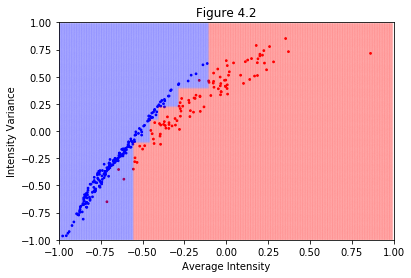

In [10]:
# create the model
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# With two dimensions
# Declare Model
model1 = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = best_dt, random_state = 100)
# Fit model to our data
model1.fit(simpleTrain,trainDigits)

decisionRegion(model1, X, Y)
mp.title("Figure 4.2")
show()

# Q) 1) d)

# Graduate Student Question

[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


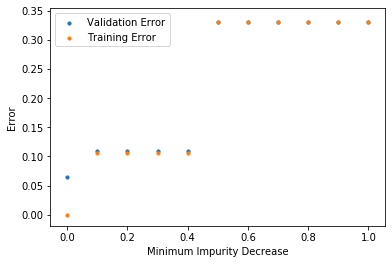

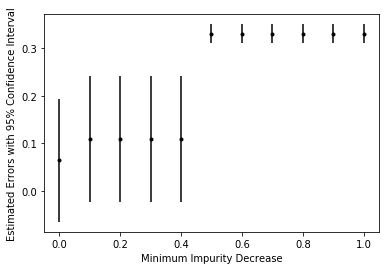

In [11]:
# USING 2D dimensional data
mid = [0,0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# model = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes =5)
# x  = cross_validate(model, simpleTrain, trainDigits, cv = 10, scoring='accuracy', return_train_score = True)
# print(x)
# print(f)
# USING 2D dimensional data
x = []
y = []
z = []
p =[]
m=[]
n = []
std =[]
for i in range(len(mid)):
    #print(i)
    model  = DecisionTreeClassifier(criterion = 'entropy', min_impurity_decrease = mid[i], random_state = 100)
    #model2.predict(testFeatures)
    cvs =  cross_validate(model, simpleTrain, trainDigits, cv = 10, scoring='accuracy', return_train_score = True)
    test_err = 1-cvs['test_score']
    train_err = 1 - cvs['train_score']
    evsm_test = test_err.mean()
    evsm_train = train_err.mean()
    temp = stdev(test_err)
    temp2 = evsm_test + temp
    m.append(evsm_test)
    n.append(evsm_train)
    std.append(2*temp)
    p.append(temp2)
    x.append(mid[i])
    y.append(evsm_test)
    z.append([mid[i],evsm_test])
        
# print(len(x))
# print(len(y))
print(mid)   
mp.scatter(x,y, s=10, label = 'Validation Error')
mp.scatter(x,n, s = 10, label = "Training Error" )
mp.xlabel("Minimum Impurity Decrease")
#mp.xscale('log')
mp.ylabel("Error")
#mp.title("Figure 4.1")
mp.legend()
mp.show()


mp.errorbar(x, m, yerr=std, fmt='.k');

mp.xlabel("Minimum Impurity Decrease")
#mp.xscale('log')
mp.ylabel("Estimated Errors with 95% Confidence Interval")
#mp.title("Figure 4.1a")

show()

In [12]:
best_dt2 = minimum(x,p)
best_dt2

0

# The optimal value of min_impurity_decrease is 0

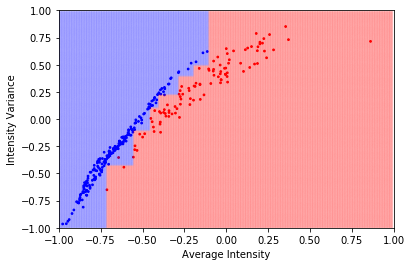

In [13]:
# create the model
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# With two dimensions
# Declare Model
model2 = DecisionTreeClassifier(criterion = 'entropy', min_impurity_decrease = best_dt2, random_state = 100)
# Fit model to our data
model2.fit(simpleTrain,trainDigits)

decisionRegion(model2, X, Y)
show()

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The m

[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


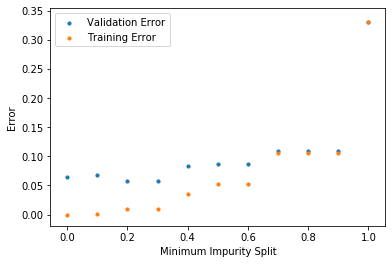

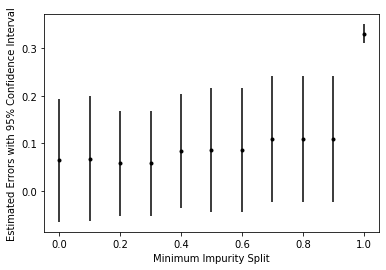

In [14]:
# USING 2D dimensional data
mis = [0,0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# model = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes =5)
# x  = cross_validate(model, simpleTrain, trainDigits, cv = 10, scoring='accuracy', return_train_score = True)
# print(x)
# print(f)
# USING 2D dimensional data
x = []
y = []
z = []
p =[]
m=[]
n = []
std =[]
for i in range(len(mid)):
    #print(i)
    model  = DecisionTreeClassifier(criterion = 'entropy', min_impurity_split = mis[i], random_state = 100)
    #model2.predict(testFeatures)
    cvs =  cross_validate(model, simpleTrain, trainDigits, cv = 10, scoring='accuracy', return_train_score = True)
    test_err = 1-cvs['test_score']
    train_err = 1 - cvs['train_score']
    evsm_test = test_err.mean()
    evsm_train = train_err.mean()
    temp = stdev(test_err)
    temp2 = evsm_test + temp
    m.append(evsm_test)
    n.append(evsm_train)
    std.append(2*temp)
    p.append(temp2)
    x.append(mis[i])
    y.append(evsm_test)
    z.append([mis[i],evsm_test])
        
# print(len(x))
# print(len(y))
print(mid)   
mp.scatter(x,y, s=10, label = 'Validation Error')
mp.scatter(x,n, s = 10, label = "Training Error" )
mp.xlabel("Minimum Impurity Split")
#mp.xscale('log')
mp.ylabel("Error")
#mp.title("Figure 4.1")
mp.legend()
mp.show()


mp.errorbar(x, m, yerr=std, fmt='.k');

mp.xlabel("Minimum Impurity Split")
#mp.xscale('log')
mp.ylabel("Estimated Errors with 95% Confidence Interval")
#mp.title("Figure 4.1a")

show()

In [15]:
best_dt3 = minimum(x,p)
best_dt3

0.2

# The optimal value of min_impurity_split is 0.2

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


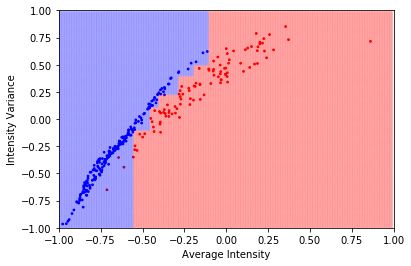

In [16]:
# create the model
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# With two dimensions
# Declare Model
model3 = DecisionTreeClassifier(criterion = 'entropy', min_impurity_split = best_dt3, random_state = 100)
# Fit model to our data
model3.fit(simpleTrain,trainDigits)

decisionRegion(model3, X, Y)
show()

# Q) 1) e)

[10, 100, 1000]
[5, 10, 15, 20, 30, 40, 50, 75, 100, 200, 500, 1000, 10000]
Plot for number of max_leaf_nodes = 10


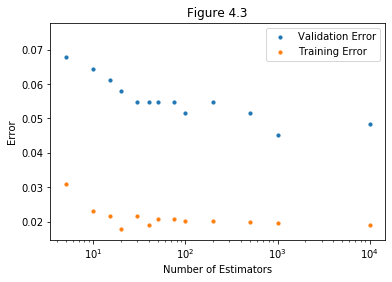

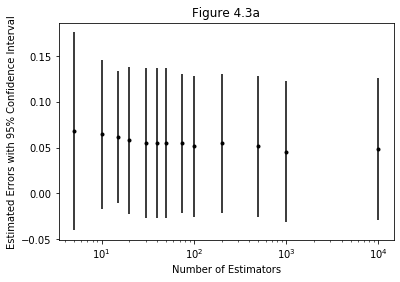

Plot for number of max_leaf_nodes = 100


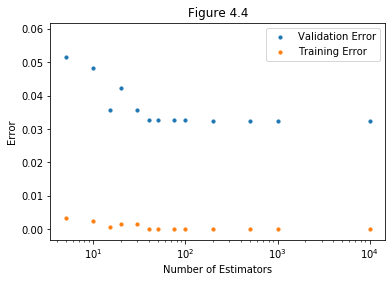

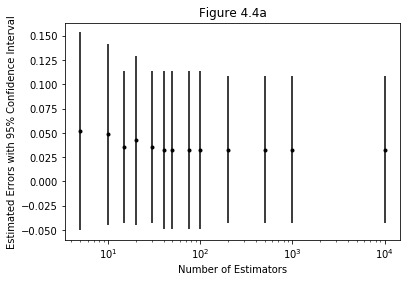

Plot for number of max_leaf_nodes = 1000


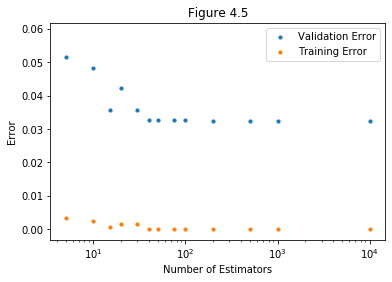

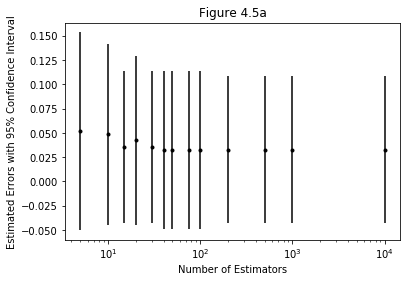

In [17]:
# USING 2D dimensional data
n_estimators = [5, 10, 15, 20, 30, 40, 50, 75, 100, 200, 500, 1000, 10000]
mln = [10, 100, 1000]
# model = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes =5)
# x  = cross_validate(model, simpleTrain, trainDigits, cv = 10, scoring='accuracy', return_train_score = True)
# print(x)
# print(f)
# USING 2D dimensional data
x1 = []
y1 = []
p1 =[]
z =[]
print(mln)
print(n_estimators)
for i in range(len(mln)):
    x = []
    y = []
    p =[]
    m=[]
    n = []
    std =[]

    for j in range(len(n_estimators)):
    #print(i)
        model  = RandomForestClassifier(max_leaf_nodes = mln[i], n_estimators = n_estimators[j],random_state = 100, n_jobs =-1)
        #model2.predict(testFeatures)
        cvs =  cross_validate(model, simpleTrain, trainDigits, cv = 10, scoring='accuracy', return_train_score = True, n_jobs =-1)
        test_err = 1-cvs['test_score']
        train_err = 1 - cvs['train_score']
        evsm_test = test_err.mean()
        evsm_train = train_err.mean()
        temp = stdev(test_err)
        temp2 = evsm_test + temp
        m.append(evsm_test)
        n.append(evsm_train)
        std.append(2*temp)
        p.append(temp2)
        x.append(mln[i])
        y.append(n_estimators[j])
        p1.append(temp2)
        x1.append(mln[i])
        y1.append(n_estimators[j])
        z.append([mln[i],n_estimators[j],evsm_test, temp2])
        
    # print(len(x))
    # print(len(y))
    print("Plot for number of max_leaf_nodes = " + str(mln[i]))
       
    mp.scatter(y,m, s=10, label = 'Validation Error')
    mp.scatter(y,n, s = 10, label = "Training Error" )
    mp.xlabel("Number of Estimators")
    mp.xscale('log')
    mp.ylabel("Error")
    mp.title("Figure 4." + str(i+3))
    mp.legend()
    mp.show()


    mp.errorbar(y, m, yerr=std, fmt='.k');

    mp.xlabel("Number of Estimators")
    mp.xscale('log')
    mp.ylabel("Estimated Errors with 95% Confidence Interval")
    mp.title("Figure 4." + str(i+3)+"a")

    show()

In [18]:
tablerf = pd.DataFrame(data= z, columns = ['Max_Leaf_nodes', 'No of Estimators', 'Validation Error', "Upper bound on the Error with 95% Confidence Interval"])
tablerf.sort_values(by = "Upper bound on the Error with 95% Confidence Interval", axis = 0)

,Max_Leaf_nodes,No of Estimators,Validation Error,Upper bound on the Error with 95% Confidence Interval
38,1000,10000,0.032480,0.070360
36,1000,500,0.032480,0.070360
35,1000,200,0.032480,0.070360
25,100,10000,0.032480,0.070360
24,100,1000,0.032480,0.070360
23,100,500,0.032480,0.070360
22,100,200,0.032480,0.070360
37,1000,1000,0.032480,0.070360
34,1000,100,0.032581,0.073397
33,1000,75,0.032581,0.073397


In [19]:
best_rf_mln, best_rf_n_est, best_rf_err = minimum3(x1, y1, p1)
best_rf_mln

100

In [20]:
best_rf_n_est

200

# Q) 1) f)

# The max_leaf_nodes values 10 is most affected by the bagging approoach because the testing error is continously decreased with number of estimators (bagging).
# And there is no difference between testing error plots for max_leaf_nodes values 100 and 1000 because the maximum possible number of leaf nodes is LESS than 100. So, the values greater than 100 didn't make any impact.

# Q) 1) g)

# For max_leaf_nodes value of 10, the n_estimators had a great impact, the testing error continued decreasing until 1000 and it started increasing after 1000
# For max_leaf_nodes value of 100, the n_estimators had a good impact but not like in the case of 10, the testing error continued decreasing until 40 estimators and then the testing error remained almost same.
# For max_leaf_nodes value of 1000, the n_estimators had a good impact but not like in the case of 10, the testing error continued decreasing until 40 estimators and then the testing error remained almost same.

# Q) 1) h)

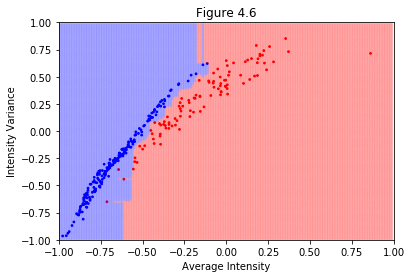

In [21]:
# create the model
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# With two dimensions
# Declare Model
model4 = RandomForestClassifier(max_leaf_nodes = best_rf_mln, n_estimators = best_rf_n_est,random_state = 100, n_jobs =-1)
# Fit model to our data
model4.fit(simpleTrain,trainDigits)

decisionRegion(model4, X, Y)
mp.title("Figure 4.6")
show()

# Even though I got the less validation error with the above random forest model, it is overfitting a little bit

# Q) 1) i)

# Graduate Student Question

In [22]:
# USING 2D dimensional data
n_estimators = [1, 10, 100, 1000]
mln = [10, 100, 1000]
mf = [0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# model = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes =5)
# x  = cross_validate(model, simpleTrain, trainDigits, cv = 10, scoring='accuracy', return_train_score = True)
# print(x)
# print(f)
# USING 2D dimensional data
x = []
y = []
z = []
p =[]
m=[]
n = []
std =[]
print(mf)
print(mln)
print(n_estimators)
for k in range(len(mf)):
    for i in range(len(mln)):
        for j in range(len(n_estimators)):
        #print(i)
            model  = RandomForestClassifier(max_leaf_nodes = mln[i], n_estimators = n_estimators[j], max_features = mf[k],random_state = 100, n_jobs =-1)
            #model2.predict(testFeatures)
            cvs =  cross_val_score(model, simpleTrain, trainDigits, cv = 10, scoring='accuracy', n_jobs =-1)
            test_err = 1-cvs
            evsm_test = test_err.mean()
            temp = stdev(test_err)
            temp2 = evsm_test + temp
            m.append(evsm_test)
            std.append(2*temp)
            p.append(temp2)
            x.append(mln[i])
            y.append(n_estimators[j])
            z.append([mf[k],mln[i], n_estimators[j], evsm_test])
        

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
[10, 100, 1000]
[1, 10, 100, 1000]


In [23]:
z = np.asarray(z)
table = pd.DataFrame(data = z, columns = ["max_features", "max_leaf_nodes", "no of estimators" , "Cross Validation Error"])
table

,max_features,max_leaf_nodes,no of estimators,Cross Validation Error
0,0.1,10.0,1.0,0.096499
1,0.1,10.0,10.0,0.064435
2,0.1,10.0,100.0,0.051633
3,0.1,10.0,1000.0,0.045181
4,0.1,100.0,1.0,0.077446
5,0.1,100.0,10.0,0.048407
6,0.1,100.0,100.0,0.032581
7,0.1,100.0,1000.0,0.032480
8,0.1,1000.0,1.0,0.077446
9,0.1,1000.0,10.0,0.048407


# Q) 1) j)

In [24]:
def minimumtemp(x,y):
    min = np.argmin(y)

    return x[min], y[min]

[1, 5, 10, 100, 1000, 10000]


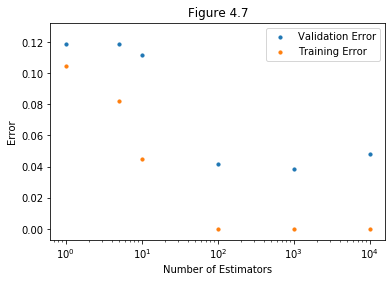

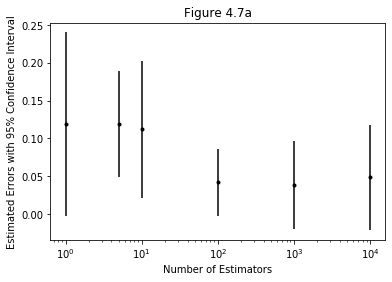

In [25]:
# USING 2D dimensional data
n_estimators = [1, 5, 10, 100, 1000, 10000]
# model = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes =5)
# x  = cross_validate(model, simpleTrain, trainDigits, cv = 10, scoring='accuracy', return_train_score = True)
# print(x)
# print(f)
# USING 2D dimensional data
x = []
y = []
z = []
p =[]
m=[]
n = []
std =[]
for i in range(len(n_estimators)):
    #print(i)
    model  = AdaBoostClassifier(n_estimators = n_estimators[i], random_state = 100)
    #model2.predict(testFeatures)
    cvs =  cross_validate(model, simpleTrain, trainDigits, cv = 10, scoring='accuracy', return_train_score = True, n_jobs = -1)
    test_err = 1-cvs['test_score']
    train_err = 1 - cvs['train_score']
    evsm_test = test_err.mean()
    evsm_train = train_err.mean()
    temp = stdev(test_err)
    temp2 = evsm_test + temp
    m.append(evsm_test)
    n.append(evsm_train)
    std.append(2*temp)
    p.append(temp2)
    x.append(n_estimators[i])
    y.append(evsm_test)
    z.append([n_estimators[i],evsm_test])
        
# print(len(x))
# print(len(y))
print(n_estimators)  
mp.scatter(x,y, s=10, label = 'Validation Error')
mp.scatter(x,n, s = 10, label = "Training Error" )
mp.xlabel("Number of Estimators")
mp.xscale('log')
mp.ylabel("Error")
mp.title("Figure 4.7")
mp.legend()
mp.show()


mp.errorbar(x, m, yerr=std, fmt='.k');

mp.xlabel("Number of Estimators")
mp.xscale('log')
mp.ylabel("Estimated Errors with 95% Confidence Interval")
mp.title("Figure 4.7a")

show()

In [26]:
depth = []
best_ada =[]
ada_error = []
best_ada1, temp1 = minimumtemp(x,p)
depth.append(1)

best_ada.append(best_ada1)
ada_error.append(temp1)



# Q) 1) k)

[1, 5, 10, 100, 1000, 10000]


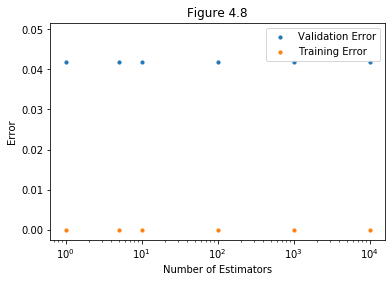

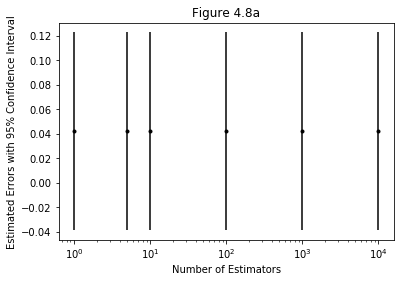

In [27]:
# USING 2D dimensional data
n_estimators = [1, 5, 10, 100, 1000, 10000]
# model = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes =5)
# x  = cross_validate(model, simpleTrain, trainDigits, cv = 10, scoring='accuracy', return_train_score = True)
# print(x)
# print(f)
# USING 2D dimensional data
x = []
y = []
z = []
p =[]
m=[]
n = []
std =[]
for i in range(len(n_estimators)):
    
    model  = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=10), n_estimators = n_estimators[i], random_state = 100)
    #model2.predict(testFeatures)
    cvs =  cross_validate(model, simpleTrain, trainDigits, cv = 10, scoring='accuracy', return_train_score = True)
    test_err = 1-cvs['test_score']
    train_err = 1 - cvs['train_score']
    evsm_test = test_err.mean()
    evsm_train = train_err.mean()
    temp = stdev(test_err)
    temp2 = evsm_test + temp
    m.append(evsm_test)
    n.append(evsm_train)
    std.append(2*temp)
    p.append(temp2)
    x.append(n_estimators[i])
    y.append(evsm_test)
    z.append([n_estimators[i],evsm_test])
        
# print(len(x))
# print(len(y))
print(n_estimators)   
mp.scatter(x,y, s=10, label = 'Validation Error')
mp.scatter(x,n, s = 10, label = "Training Error" )
mp.xlabel("Number of Estimators")
mp.xscale('log')
mp.ylabel("Error")
mp.title("Figure 4.8")
mp.legend()
mp.show()


mp.errorbar(x, m, yerr=std, fmt='.k');

mp.xlabel("Number of Estimators")
mp.xscale('log')
mp.ylabel("Estimated Errors with 95% Confidence Interval")
mp.title("Figure 4.8a")

show()

In [28]:
best_ada2, temp2 = minimumtemp(x,p)
depth.append(10)

best_ada.append(best_ada2)
ada_error.append(temp2)

# Q) 1) l)

[1, 5, 10, 100, 1000, 10000]


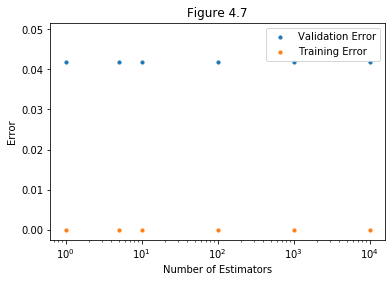

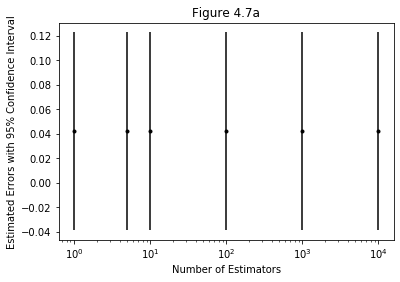

In [29]:
# USING 2D dimensional data
n_estimators = [1, 5, 10, 100, 1000, 10000]
# model = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes =5)
# x  = cross_validate(model, simpleTrain, trainDigits, cv = 10, scoring='accuracy', return_train_score = True)
# print(x)
# print(f)
# USING 2D dimensional data
x = []
y = []
z = []
p =[]
m=[]
n = []
std =[]
for i in range(len(n_estimators)):
    
    model  = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1000), n_estimators = n_estimators[i], random_state = 100)
    #model2.predict(testFeatures)
    cvs =  cross_validate(model, simpleTrain, trainDigits, cv = 10, scoring='accuracy', return_train_score = True)
    test_err = 1-cvs['test_score']
    train_err = 1 - cvs['train_score']
    evsm_test = test_err.mean()
    evsm_train = train_err.mean()
    temp = stdev(test_err)
    temp2 = evsm_test + temp
    m.append(evsm_test)
    n.append(evsm_train)
    std.append(2*temp)
    p.append(temp2)
    x.append(n_estimators[i])
    y.append(evsm_test)
    z.append([n_estimators[i],evsm_test])
        
# print(len(x))
# print(len(y))
print(n_estimators)  
mp.scatter(x,y, s=10, label = 'Validation Error')
mp.scatter(x,n, s = 10, label = "Training Error" )
mp.xlabel("Number of Estimators")
mp.xscale('log')
mp.ylabel("Error")
mp.title("Figure 4.7")
mp.legend()
mp.show()


mp.errorbar(x, m, yerr=std, fmt='.k');

mp.xlabel("Number of Estimators")
mp.xscale('log')
mp.ylabel("Estimated Errors with 95% Confidence Interval")
mp.title("Figure 4.7a")

show()

In [30]:
best_ada3, temp3 = minimumtemp(x,p)
depth.append(1000)

best_ada.append(best_ada3)
ada_error.append(temp3)

In [31]:
depth

[1, 10, 1000]

# Q) 1) m)

In [32]:
best_ada_depth, best_ada_n_estimators, best_ada_error = minimum3(depth, best_ada, ada_error)
best_ada_depth

1

In [33]:
best_ada_n_estimators

100

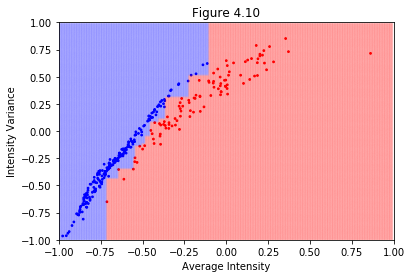

In [34]:
# create the model
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# With two dimensions
# Declare Model
model4 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=best_ada_depth), n_estimators = best_ada_n_estimators, random_state = 100)
# Fit model to our data
model4.fit(simpleTrain,trainDigits)

decisionRegion(model4, X, Y)
mp.title("Figure 4.10")
show()

# Q) 2)

# Testing Data

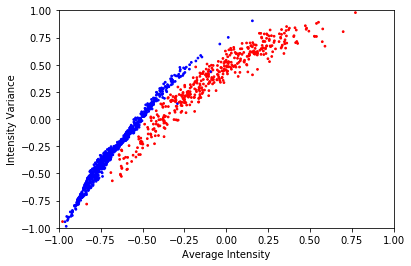

In [35]:
#Convert the 256D TEST data (testFeatures) to 2D data
#We need X and Y for plotting and simpleTest for evaluating the model.
#They contain the same points in a different arrangement

#print(len(trainFeatures))
Xtest = []
Ytest = []
simpleTest = []

#Colors will be passed to the graphing library to color the points.
#1's are blue: "b" and 5's are red: "r"
colorstest = []
for index in range(len(testFeatures)):
    #produce the 2D dataset for graphing/training and scale the data so it is in the [-1,1] square
    xNewtest = 2*np.average(testFeatures[index])+.75 
    yNewtest = 3*np.var(testFeatures[index])-1.5
    Xtest.append(xNewtest)
    Ytest.append(yNewtest)
    simpleTest.append([xNewtest,yNewtest])
    #trainDigits will still be the value we try to classify. Here it is the string "1.0" or "5.0"
    if(testDigits[index]=="1.0"):
        colorstest.append("b")
        testDigits[index] = 0
    else:
        colorstest.append("r")
        testDigits[index] = 1

#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
mp.scatter(Xtest,Ytest,s=3,c=colorstest)

#specify the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#display the current graph
show()

In [36]:
for index in range(len(trainFeatures)):
    #trainDigits will still be the value we try to classify. Here it is the string "1.0" or "5.0"
    if(trainDigits[index]=="1.0"):
        colors.append("b")
        trainDigits[index] = 0
    else:
        colors.append("r")
        trainDigits[index] = 1

# Polynomial SVM: From Home work 2, the optimal values of degree and C are 2 and 87.83
# Selected a Polynomial SVM with degree = 2 and C = 87.83

In [37]:
svm = SVC(C = 87.83, kernel = 'poly', degree = 2, gamma= 'scale')
clf = svm.fit(simpleTrain, trainDigits)
y_pred = svm.predict(simpleTest)
poly_svm_accuracy = accuracy_score(testDigits, y_pred)
poly_svm_accuracy

0.9903923138510808

# I got 99 percent accuracy with the Polynomial SVM

# Neural Network: Selected a neural network with number of hidden layers = 1, number of hidden nodes  = 8, learning rate =1, and number of outputs = 2

In [38]:
dtrain = np.zeros(shape =(len(trainDigits),2))
dtest = np.zeros(shape = (len(testDigits),2))

for i in range(len(trainDigits)):
    dtrain[i][trainDigits[i]] = 1

for i in range(len(testDigits)):
    dtest[i][testDigits[i]] = 1
    


In [252]:
#The commented variables are suggestions so change them as appropriate,
#However, do not change the __init__(), train(), or predict(x=[]) function headers
#You may create additional functions as you see fit

import numpy as np
np.random.seed(100)


class Neural_Network():
    
    def __init__(self, x=[[]], y=[], p=[[]], q=[], nHiddenLayers = 0, nHiddenNodes =0, numOutputs = 0, eta = 1, iter = 0, prec = 0):
        newdata = []
        for i in range(len(x)):
            newdata.append(np.append(x[i],1))
        newdata = np.asarray(newdata)
        self.data = newdata
        newdata = []
        for i in range(len(p)):
            newdata.append(np.append(p[i],1))
        newdata = np.asarray(newdata)
        self.labels = y
        self.test = newdata
        self.testlabels = q
        self.nInputNodes = self.data.shape[1]
        self.nHiddenLayers = nHiddenLayers
        self.nHiddenNodes = nHiddenNodes
        self.numOutputs = numOutputs
        self.eta = eta
        self.maxIt = iter
        self.prec = prec
        self.weights=[np.random.uniform(low = -2, high = 2, size = (self.nHiddenNodes, self.nInputNodes))]
        for i in range(self.nHiddenLayers-1):
            self.weights.append(np.random.uniform(low =-2, high = 2, size =(self.nHiddenNodes, self.nHiddenNodes+1))) 
        self.weights.append(np.random.uniform(low =-2, high = 2, size = (self.numOutputs, self.nHiddenNodes+1)))

    # Tanh activation function for all layers except the output layer
    def tanh(self, s):      
        return np.tanh(s)

    # Derivative of tanh for all layers
    def tanhPrime(self, s):
        return (1 - s**2)

    # Activation function for all the input data
    def af_predict(self,t): 
#         t = np.tanh(t)
        p =[]
        for i in range(len(t)):
            max = np.argmax(t[i])
            y = np.zeros(len(t[i]))
            y[max] = 1
            p.append(y)
        return np.asarray(p)
    
    # Activation function for the output layer of the feedforward graph
    def af(self,t):
#         t = np.tanh(t)
        max = np.argmax(t[0])
        y = np.zeros(self.numOutputs)
        y[max] = 1
#         temp = np.asarray(y).reshape(1,self.numOutputs)
        return np.asarray(y)   

#     # Derivative of sigmoid for the output layer
#     def sigmoidPrime(self, s):
#         return s * (1 - s)
    
#     def decision_A(self,x):
#         out =[]
# #         print(x.shape)
# #         print(f)
#         for i in range(x.shape[0]):
#             s =np.zeros(x.shape[1])            
#             max = np.argmax(x[i])
#             #print(max)
#             s[max] = 1
#             out.append(s)
#         out = np.asarray(out)
#         print(out.shape)
#         print(f)
#         return out

    def misclassifications(self, x,y):
        count = 0
        for i in range(y.shape[0]): 
            if np.any(x[i]-y[i]):
                count += 1                
        return count
    
    def predict(self, data=[]):
        prev = data.T
             
        for i in range(len(self.weights)-1):
            temp = (np.matmul(self.weights[i], prev))
            temp2 = self.tanh(temp)
            y=[np.ones(temp2.shape[1])]
            prev = np.append(y, temp2, axis = 0)
#             print(prev.shape)
#             print(f)
        temp_f = np.matmul(self.weights[self.nHiddenLayers], prev)
        temp4 = self.af_predict(np.transpose(temp_f))
        return temp4
    
    def feedforward(self, x):
#         print(x)
        self.r = []
        self.r.append(x)
#         print(self.r)
#         print(f)
        prev = x.T        
        for i in range(len(self.weights)-1):
#             print(self.weights[i])
#             print(prev)
            temp = np.matmul(self.weights[i], prev)
#             print(temp)
            temp2 = self.tanh(temp)
            prev = np.append([[1]], temp2).reshape(temp2.shape[0]+1,1)
#             print(prev.shape)
#             print(f)
            self.r.append(prev)
#             print(self.r)
#             print('\n')
            
#         print(self.weights[self.nHiddenLayers])
#         print(prev)
        temp_f = np.matmul(self.weights[self.nHiddenLayers], prev)
        temp4 =self.af(temp_f.T)
        return temp4

    def backward(self, x, y):
        self.gradient=[]
#         print(x)
#         print(y)
#         print(f)
        o = self.feedforward(x)
#         print(o)
        self.out_error = y - o
#         print(self.out_error)
#         print(f)

        for i in reversed(range(len(self.weights))):
            if i == 0 and i != len(self.weights)-1:
                temp2 = temp.T.dot(self.weights[i+1]).T
#                 print(self.sigmoidPrime(self.r[i+1]))
                temp3 = temp2*self.tanhPrime(self.r[i+1])
                temp4 = (temp3.dot(self.r[i]))*2/len(self.data)
#                 print('w')
#                 print(self.weights[i])
#                 print((self.eta*temp4*2)/len(self.data))
                self.gradient.append(self.eta*2*temp4[1:])
                    
            elif i > 0 and i<len(self.weights)-1:
                temp2 = temp.T.dot(self.weights[i+1]).T
                
#                 print(self.sigmoidPrime(self.r[i+1]))
                temp3 = temp2*self.tanhPrime(self.r[i+1])
#                 print(temp3.shape)
                temp4 = (temp3.dot(self.r[i].T))*2/len(self.data)
#                 print('w')
#                 print(self.weights[i])
#                 print((self.eta*temp4*2)/len(self.data))
                self.gradient.append(self.eta*2*temp4[1:])
                temp = temp3[1:]
                    
            elif i == len(self.weights)-1:
#                 print(self.weights)
#                 print(self.out_error)
#                 print(o)
#                 print(self.af_derivative(o).T)
                temp = self.out_error.reshape(self.numOutputs,1)
#                 temp = (self.out_error*self.tanhPrime(o)).reshape(self.numOutputs,1)
#                 print(temp.shape)
#                 print(f)
#                 print(self.weights[i])
                temp2 = self.r[i].dot(temp.T)*2/len(self.data)
                self.gradient.append(self.eta*temp2.T)
#                 print(self.weights[i])
#                 print('\n')

        self.gradient = self.gradient[::-1]
    
        for i in range(len(self.weights)):
            self.weights[i] += self.gradient[i]
#         print(self.weights)
#         print(f)

    def train (self):        
        #print(self.eta)
#         print(self.weights[0].shape)
#         print(f)
        e = 0
        obj_training =[]
        obj_testing = []
        epoch = []
        mis_training = []
        mis_testing =[]
        epoch.append(e)
        pred_train = self.predict(self.data)
        pred_test = self.predict(self.test)
        obj_training.append(((np.linalg.norm(self.labels - pred_train))**2)/len(self.data))
        obj_testing.append(((np.linalg.norm(self.testlabels - pred_test))**2)/len(self.test))
        mis_training.append(self.misclassifications(self.labels, pred_train))
        mis_testing.append(self.misclassifications(self.testlabels, pred_test))
        mse = 100000000000
#         while e <= self.maxIt and mse >= self.prec:
        while e <= self.maxIt:
            prev = mse
#             print(prev)
#             print(f)
            e += 1
            for i in range(len(self.data)):
                self.backward(self.data[i].reshape(1,self.nInputNodes), self.labels[i])                
#                 print(self.delta)
#             print(self.weights)
#             print(f)                
#             print('after')
#             print(self.weights)
            pred_train = self.predict(self.data)
            pred_test = self.predict(self.test)
            mse = ((np.linalg.norm(self.labels - pred_train))**2)/len(self.data)
            mse_test = ((np.linalg.norm(self.testlabels - pred_test))**2)/len(self.test)
#             print(mse)
#             print(f)            
            obj_training.append(mse)
            obj_testing.append(mse_test)
            epoch.append(e)
            mis_training.append(self.misclassifications(self.labels, pred_train))
            mis_testing.append(self.misclassifications(self.testlabels, pred_test))
            if mse >= prev:
                self.eta = 0.7*self.eta
            prev = mse
        return self.weights, epoch, obj_training, mis_training, obj_testing, mis_testing

In [40]:
nHiddenLayers = 1
nHiddenNodes =8
numOutputs = 2
eta = 1
iter = 100

prec = 0.5

NN = Neural_Network(np.asarray(simpleTrain), np.asarray(dtrain), np.asarray(simpleTest), np.asarray(dtest), nHiddenLayers, nHiddenNodes, numOutputs, eta, iter,prec)
w, epoch, obj_training, mis_training, obj_testing, mis_testing = NN.train()

In [41]:
#w

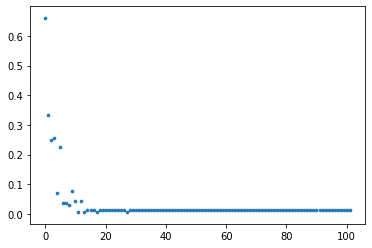

In [42]:
mp.scatter(epoch,obj_training, s  = 7) 

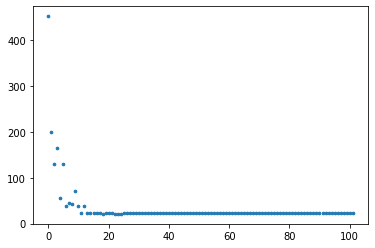

In [43]:
mp.scatter(epoch,mis_testing, s  = 7) 

In [44]:
misclass = mis_testing[-1]
misclass

23

In [45]:
nn_accuracy = 1- (misclass/len(testDigits))
nn_accuracy

0.9815852682145717

# I got 99 percent accuracy with the neural network

# Random Forest: Selected a model with no of estimators = 200 and max_leaf_nodes  = 100 

In [46]:
print(best_rf_mln)
print(best_rf_n_est)


100
200


In [47]:
model4 = RandomForestClassifier(max_leaf_nodes = best_rf_mln, n_estimators = best_rf_n_est,random_state = 100, n_jobs =-1)
# Fit model to our data
model4.fit(simpleTrain,trainDigits)
y_pred = model4.predict(simpleTest)
rf_accuracy = accuracy_score(testDigits, y_pred)
rf_accuracy

0.9727782225780625

# I got 98 percent accuracy with the Random Forest

# AdaBoost Classifier: Selected a model with max_depth  = 1 and no of estimators = 100

In [48]:
print(best_ada_depth)
print(best_ada_n_estimators)

1
100


In [49]:
model4 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=best_ada_depth), n_estimators = best_ada_n_estimators, random_state = 100)
# Fit model to our data
model4.fit(simpleTrain,trainDigits)
y_pred = model4.predict(simpleTest)
ada_accuracy = accuracy_score(testDigits, y_pred)
ada_accuracy

0.9759807846277022

# I got 97 percent accuracy with the AdaBoost classifier

# Concentration Bounds

In [50]:
delta1 = 0.25
n_test = len(testFeatures)

In [51]:
def e(n_test, delta, t, etest):
    if t == "Markov":
        return etest/delta
    elif t == "Chebyshev":
        return sqrt(1/(4*n_test*delta))
    else:
        return sqrt((1/(2*n_test))*log(2/delta))


In [52]:
sqrt((1/(2*n_test))*log(2/delta1))

0.02885208087345724

In [53]:
acc = [poly_svm_accuracy, nn_accuracy, rf_accuracy, ada_accuracy]
1-np.asarray(acc)

array([0.00960769, 0.01841473, 0.02722178, 0.02401922])

In [54]:
clas = ["Polynomial SVM", "Neural Network", "Random Forest", "Adaboost Classifier"]
clas

['Polynomial SVM', 'Neural Network', 'Random Forest', 'Adaboost Classifier']

In [55]:
t = ["Markov", "Chebyshev", "Hoeffding"]
conf =["75%", "95%", "99%"]
delta = [0.25, 0.05, 0.01]

In [56]:
def bounds(acc,clas,delta,conf, e, t):
    p =[]  
    for i in range(len(acc)):
        for j in range(len(delta)):
            for k in t:
                temp = e(n_test,delta[j], k, 1-acc[i])
                p.append([clas[i], conf[j], k,delta[j],  acc[i], 1-acc[i],temp, 1-acc[i]+temp])
    return p
                
                
                

In [57]:
b = bounds(acc, clas, delta, conf, e,t)
columns = ["Classifier", "Given Confidence Interval", "Type of bound", "Delta", "Obtained Accuracy", "Obtained Error", "e", "D"]
table_bound = pd.DataFrame(data = b, columns = columns) 
table_bound
# table_bound[table_bound['Type of bound'] == 'Markov'][table_bound['Classifier'] == "Neural Network"].sort_values(by = ["Type of bound", "Classifier"])
# # table_bound[table_bound['Type of bound'] == 'Hoeffding'].sort_values(by = ["Classifier","Given Confidence Interval","D"])
# # table_bound.sort_values(by = ["Classifier","Given Confidence Interval","D"])

,Classifier,Given Confidence Interval,Type of bound,Delta,Obtained Accuracy,Obtained Error,e,D
0,Polynomial SVM,75%,Markov,0.25,0.990392,0.009608,0.038431,0.048038
1,Polynomial SVM,75%,Chebyshev,0.25,0.990392,0.009608,0.028296,0.037903
2,Polynomial SVM,75%,Hoeffding,0.25,0.990392,0.009608,0.028852,0.038460
3,Polynomial SVM,95%,Markov,0.05,0.990392,0.009608,0.192154,0.201761
4,Polynomial SVM,95%,Chebyshev,0.05,0.990392,0.009608,0.063271,0.072879
5,Polynomial SVM,95%,Hoeffding,0.05,0.990392,0.009608,0.038428,0.048036
6,Polynomial SVM,99%,Markov,0.01,0.990392,0.009608,0.960769,0.970376
7,Polynomial SVM,99%,Chebyshev,0.01,0.990392,0.009608,0.141478,0.151086
8,Polynomial SVM,99%,Hoeffding,0.01,0.990392,0.009608,0.046055,0.055662
9,Neural Network,75%,Markov,0.25,0.981585,0.018415,0.073659,0.092074


# Q) 2) a)

# Comparing only the Markov e values of the models at different confidence intervals as the Chebyshev and Hoeffding bounds are independent of the classifiers 

In [58]:
table_bound[table_bound['Type of bound'] == 'Markov'][table_bound['Classifier'] == "Neural Network"].sort_values(by = ["Type of bound", "Classifier"])
    

C:\Users\kalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Classifier,Given Confidence Interval,Type of bound,Delta,Obtained Accuracy,Obtained Error,e,D
9,Neural Network,75%,Markov,0.25,0.981585,0.018415,0.073659,0.092074
12,Neural Network,95%,Markov,0.05,0.981585,0.018415,0.368295,0.386709
15,Neural Network,99%,Markov,0.01,0.981585,0.018415,1.841473,1.859888


In [59]:

table_bound[table_bound['Type of bound'] == 'Markov'][table_bound['Classifier'] == "Polynomial SVM"].sort_values(by = ["Type of bound", "Classifier"])
    

C:\Users\kalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Classifier,Given Confidence Interval,Type of bound,Delta,Obtained Accuracy,Obtained Error,e,D
0,Polynomial SVM,75%,Markov,0.25,0.990392,0.009608,0.038431,0.048038
3,Polynomial SVM,95%,Markov,0.05,0.990392,0.009608,0.192154,0.201761
6,Polynomial SVM,99%,Markov,0.01,0.990392,0.009608,0.960769,0.970376


In [60]:
table_bound[table_bound['Type of bound'] == 'Markov'][table_bound['Classifier'] == "Adaboost Classifier"].sort_values(by = ["Type of bound", "Classifier"])
    

C:\Users\kalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Classifier,Given Confidence Interval,Type of bound,Delta,Obtained Accuracy,Obtained Error,e,D
27,Adaboost Classifier,75%,Markov,0.25,0.975981,0.024019,0.096077,0.120096
30,Adaboost Classifier,95%,Markov,0.05,0.975981,0.024019,0.480384,0.504404
33,Adaboost Classifier,99%,Markov,0.01,0.975981,0.024019,2.401922,2.425941


In [61]:
table_bound[table_bound['Type of bound'] == 'Markov'][table_bound['Classifier'] == "Random Forest"].sort_values(by = ["Type of bound", "Classifier"])
    

C:\Users\kalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Classifier,Given Confidence Interval,Type of bound,Delta,Obtained Accuracy,Obtained Error,e,D
18,Random Forest,75%,Markov,0.25,0.972778,0.027222,0.108887,0.136109
21,Random Forest,95%,Markov,0.05,0.972778,0.027222,0.544436,0.571657
24,Random Forest,99%,Markov,0.01,0.972778,0.027222,2.722178,2.749400


# From the "e" column of the above tables, I can say that the Random Forest classifier and AdaBoost classifier are most affected by the change in the confidence interval followed by Neural Network and Polynomial SVM

# Q) 2) b)

# The best model would be the one that has less variance in terms of the e value obtained using three type of bounds: Markov, Chebyshev, and Hoeffding. But since the e values from Chebyshev and Heoffding don't change with the model. I am using markov bound to pick the best model

# The Polynomial SVM has less variance in the e values obtained using the MArkov bound
# Also since the accuracy of the polynomial SVM is also greater than the rest
# I would select the Polynomial SVM model.

# Q) 2) c)

# Since the testing data set size is same the Hoeffding bound and Chebyshev bounds are same irrespective of the models.
# So, I considered Markov bound, which depends on the Etest of the models, along with the final reported error (Etest) in picking my best model 



# I also calculated the bound + Final reported Error (D = e + Etest) for all the models to find the best model. Please check the long table above

# #

# Extra Credit Question

# I am using the IRIS dataset which has three features

In [134]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [212]:
x = data.iloc[:,2:5]
y= data["Species"]

labels = y.unique()
labels
x.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


In [213]:
for i in range(len(y)):
    if y[i] == 'Iris-setosa':
        y[i] = 0
    elif y[i] == 'Iris-versicolor':
        y[i] = 1
    elif y[i] == 'Iris-virginica':
        y[i] = 2    

In [214]:
d = np.zeros(shape =(len(y),3))
for i in range(len(y)):
    d[i][y[i]] = 1
    


In [215]:
from sklearn.model_selection import train_test_split
x_train1, x_test, y_train1, y_test = train_test_split(x, d, test_size = 0.25, random_state = 100)
#x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size = 0.25, random_state = 100)

In [278]:
nHiddenLayers = 1
nHiddenNodes =8
numOutputs = 3
eta = 1
iter = 20

prec = 0.5

NN = Neural_Network(np.asarray(x_train1), np.asarray(y_train1), np.asarray(x_test), np.asarray(y_test), nHiddenLayers, nHiddenNodes, numOutputs, eta, iter,prec)
weights, epoch, obj_training, mis_training, obj_testing, mis_testing = NN.train()

In [279]:
weights

[array([[ 1.50099914, -1.2140126 ,  0.48858165, -1.33134995],
        [ 1.19952759, -1.05589539,  0.10611898,  0.42911698],
        [-0.79979563, -0.16885272, -1.84392157,  0.40165105],
        [-1.99801824,  0.00730851,  0.00691968, -1.75730666],
        [ 1.79941868,  0.43466849,  0.68801694, -0.14887573],
        [ 1.07854645, -1.42226432,  0.49904131,  0.37113894],
        [ 1.81655229,  1.18676061,  0.34124153, -0.17858054],
        [ 0.95378732,  1.24893501,  1.70916276,  1.30549503]]),
 array([[-1.70160218,  1.1304811 ,  0.10604535,  1.365121  , -0.3443244 ,
          0.34145314,  1.77891968,  0.40381017, -1.07297152],
        [ 0.92893068, -2.05595568, -0.61216364,  1.03048516,  0.10001919,
         -1.18837857, -0.8055892 ,  2.01157778, -1.6739759 ],
        [ 0.72963747, -1.20239196, -1.03177804,  0.99106602, -1.04057868,
         -0.85901717, -0.39991331,  0.25280653, -0.3357641 ]])]

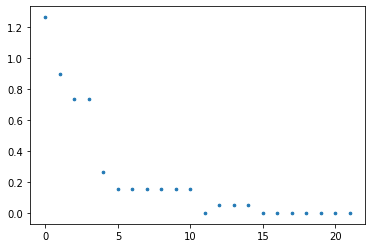

In [280]:
mp.scatter(epoch,obj_testing, s  = 7) 

Text(0, 0.5, 'Number of Misclassifications on testing error')

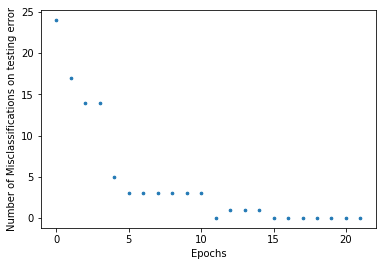

In [281]:
mp.scatter(epoch,mis_testing, s  = 7) 
mp.xlabel("Epochs")
mp.ylabel("Number of Misclassifications on testing error")

In [282]:
misc = mis_testing[-1]

In [283]:
nn_accuracy = (1- (misc/len(y_test)))*100
nn_accuracy

100.0

# I got the accuracy of 100 percent on testing error using retrained Neural Network